In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
# Split Dataset into X and Y
X = diabetes.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values
y = diabetes.iloc[:, 8].values

In [3]:
# Split the X and Y Dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [4]:
# Perform Feature Scaling as all values are not in the same range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Training the K-NN model on the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion="entropy")  
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [6]:
# Predict the Test Set Results
y_pred = rf.predict(X_test)

In [7]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

print("\nAccuracy Score: ",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix: 
[[99 24]
 [24 45]]

Accuracy Score:  0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.65      0.65      0.65        69

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192



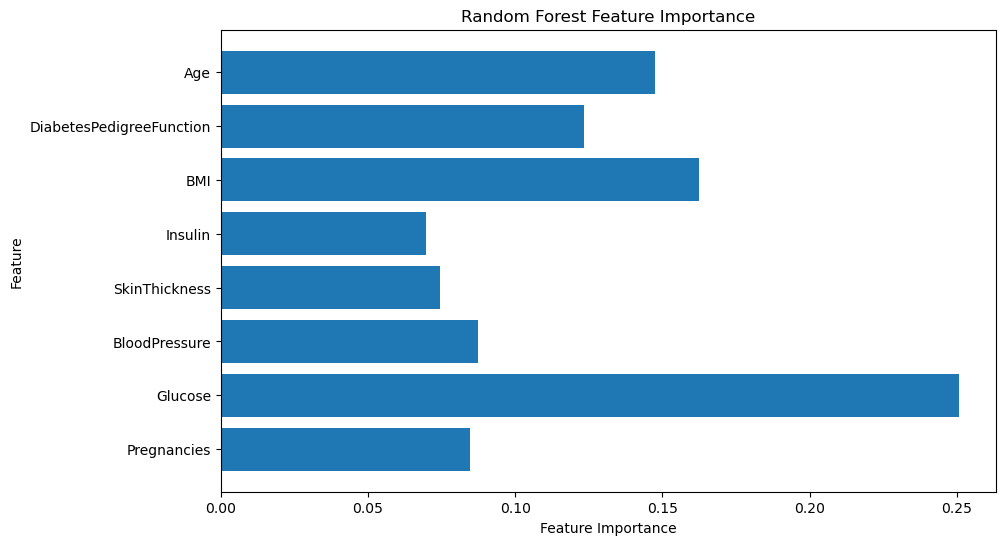

In [8]:
import matplotlib.pyplot as plt

# Assuming rf is your trained random forest model
feature_importances = rf.feature_importances_
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()